https://github.com/lukas/ml-class/tree/master/videos


In [ ]:
#!pip install wandb

In [7]:
import random
import numpy as np

import tensorflow.keras as keras
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



In [8]:
# load data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
# make pairs
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

1


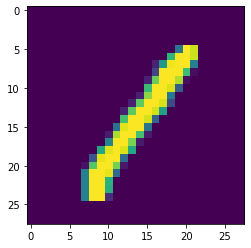

In [10]:
# take a peek at the data
plt.imshow(pairs_train[400,1])
print(labels_train[4])

In [11]:
# Weights not shared

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)


In [12]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_input (InputLayer)      [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1_input (InputLayer)    [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           flatten_input[0][0]              
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           flatten_1_input[0][0]            
______________________________________________________________________________________________

In [13]:
wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10, callbacks=[WandbCallback()])

wandb: ERROR Not authenticated.  Copy a key from https://app.wandb.ai/authorize


API Key: ········


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\surya/.netrc


Epoch 1/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6948 - accuracy: 0.5020
Epoch 2/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6933 - accuracy: 0.5065
Epoch 3/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6930 - accuracy: 0.5081
Epoch 4/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6924 - accuracy: 0.5127
Epoch 5/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6921 - accuracy: 0.5130
Epoch 6/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6916 - accuracy: 0.5156
Epoch 7/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6909 - accuracy: 0.5194
Epoch 8/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6902 - accuracy: 0.5210
Epoch 9/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6894 - accuracy: 0.5204
Epoch 10/10
7500/7500 [==============================] - 10s 1ms/step - l

In [14]:
input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Concatenate()([dense1, dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [15]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128)          100480      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 256)          0           model_1[1][0]              

In [16]:
wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10, callbacks=[WandbCallback()])

Epoch 1/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.6944 - accuracy: 0.5004
Epoch 2/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.6933 - accuracy: 0.5062
Epoch 3/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.6931 - accuracy: 0.5047: 0s
Epoch 4/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6929 - accuracy: 0.5137
Epoch 5/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.6927 - accuracy: 0.5095
Epoch 6/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6925 - accuracy: 0.5091
Epoch 7/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6923 - accuracy: 0.5116
Epoch 8/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6919 - accuracy: 0.5100
Epoch 9/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.6917 - accuracy: 0.5129
Epoch 10/10
7500/7500 [==============================] - 9s 1ms/step - los

In [17]:
Lambda?

In [20]:
from tensorflow.keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [21]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model_3 (Model)                 (None, 128)          100480      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model_3[1][0]              

In [22]:
wandb.init(project="siamese")
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10, callbacks=[WandbCallback()])

Epoch 1/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6947 - accuracy: 0.4991
Epoch 2/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 3/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 4/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6932 - accuracy: 0.4994
Epoch 5/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 6/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6932 - accuracy: 0.5007
Epoch 7/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 8/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 9/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 10/10
7500/7500 [==============================] - 10s 1ms/step - l